In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("task_3_training_e8da4715deef7d56_f8b7378_generic.csv")
data_filtered = data[[c for c in data.columns if 'gemmes' not in c ]]
data_filtered = data_filtered[[c for c in data_filtered.columns if 'gems' not in c ]]
correlation = data.corr()
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(correlation, 50))
def get_bottom_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

print("Bottom Absolute Correlations")
print(get_bottom_abs_correlations(correlation, 50))
def get_all_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr
ordered_corr = get_all_abs_correlations(correlation)

print(ordered_corr[:60])
def get_all_abs_correlations_desc(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr
ordered_corr_desc = get_all_abs_correlations_desc(correlation)
features_to_exclude = ['midlevel_features_tonal_stability','midlevel_features_dissonance','essentia_strong_peak_stdev','librosa_chroma_pct_10_3','librosa_chroma_pct_50_0','librosa_chroma_pct_50_1','librosa_chroma_pct_50_2','librosa_chroma_pct_50_3','librosa_chroma_pct_50_4','librosa_chroma_pct_50_5','librosa_chroma_pct_50_6','librosa_chroma_pct_50_7','librosa_chroma_pct_50_8','librosa_chroma_pct_50_9','librosa_chroma_pct_50_10','librosa_chroma_pct_50_11','mirtoolbox_hcdf_pct_50','mirtoolbox_novelty_pct_50','mirtoolbox_novelty_std','mirtoolbox_novelty_pct_90','mirtoolbox_roughness_pct_10','mirtoolbox_roughness_pct_50','mirtoolbox_roughness_pct_90','mirtoolbox_dynamics_mean','mirtoolbox_dynamics_pct_10','mirtoolbox_dynamics_pct_50','mirtoolbox_dynamics_pct_90','librosa_mfcc_std_1','librosa_mfcc_std_7','librosa_mfcc_std_8','librosa_mfcc_std_9','librosa_mfcc_std_10','librosa_mfcc_std_11','librosa_mfcc_pct_50_8','librosa_mfcc_pct_50_9','librosa_mfcc_pct_50_10','librosa_mfcc_pct_50_11','librosa_mfcc_pct_50_6','librosa_mfcc_pct_50_7','librosa_mfcc_pct_50_1','librosa_mfcc_pct_90_3','librosa_mfcc_pct_90_4','librosa_mfcc_pct_90_5','librosa_mfcc_pct_10_8','librosa_mfcc_pct_10_6','librosa_mfcc_pct_50_5','librosa_mfcc_pct_10_5','librosa_mfcc_pct_50_4','librosa_mfcc_pct_10_4','librosa_mfcc_pct_10_3','librosa_mfcc_pct_50_3','librosa_mfcc_pct_10_1','librosa_mfcc_pct_10_2','librosa_mfcc_pct_50_2','librosa_mfcc_pct_90_2','librosa_mfcc_pct_10_0','librosa_mfcc_pct_50_0','librosa_mfcc_pct_90_0','librosa_mfcc_mean_0','librosa_mfcc_mean_2']

data_filtered = data_filtered.loc[:, ~data_filtered.columns.isin(data_filtered.filter(features_to_exclude))]
data_targets = data_filtered.loc[:, data_filtered.columns.isin(data_filtered.filter(['arousal', 'valence', 'quadrant']))]
X = data_filtered.loc[:, ~data_filtered.columns.isin(data_filtered.filter(['arousal', 'valence', 'quadrant']))]
feature_names = list(X.columns)

In [ ]:
y = data_targets['quadrant'].to_numpy()
y = y.ravel()
y
target = (list(data_targets['quadrant'].unique()))
for i in range(len(target)):
    target[i]=str(target[i])
print(target)

In [ ]:
X = X.to_numpy()

In [ ]:
kf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2)
for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

In [ ]:

 
clf = DecisionTreeClassifier(criterion="gini", random_state=42, min_samples_leaf=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))

In [ ]:

#clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)  
clf = DecisionTreeClassifier(criterion="gini", random_state=42, min_samples_leaf=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

In [ ]:
clf = DecisionTreeClassifier(criterion="gini", random_state=42, min_samples_leaf=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=42, min_samples_leaf=8)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=45, min_samples_leaf=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf,
                                out_file=None, 
                        feature_names=feature_names,  
                      class_names=target,
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

In [ ]:
from sklearn.tree import export_text
r = export_text(clf_model)
print(r)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

In [ ]:
print("Naive Bayes score: ",nb.score(X_test, y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

In [ ]:
from numpy import arange
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from matplotlib import pyplot
def get_models():
    models = dict()
# explore ratios from 10% to 100% in 10% increments
    for i in arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        # set max_samples=None to use 100%
        if i == 1.0:
            i = None
        models[key] = RandomForestClassifier(max_samples=i)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
# define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the results
    
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [ ]:

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
# evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state=100)

In [ ]:
forest.fit(X_train,y_train)
predictions = forest.predict(X_test)
print("Accuracy:",accuracy_score(y_test, predictions))

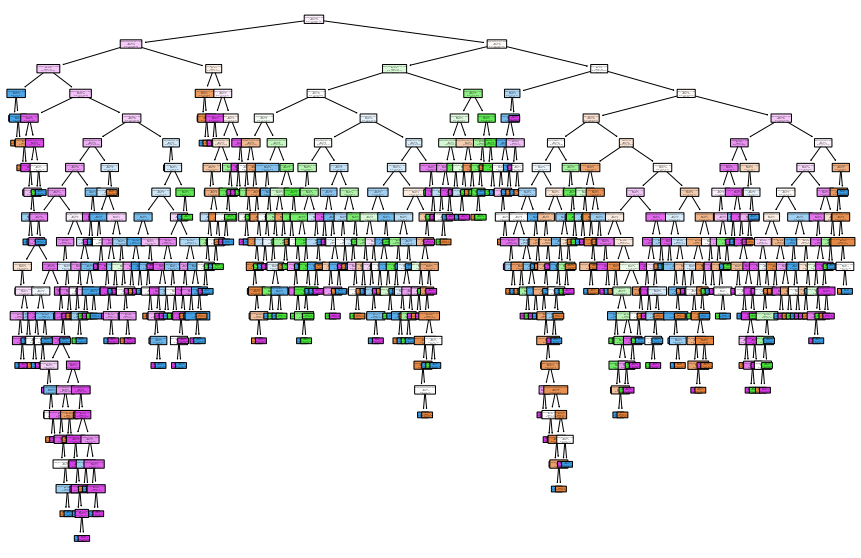

In [542]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(forest.estimators_[0], 
          feature_names=feature_names,  
                      class_names=target, 
          filled=True, rounded=True)

plt.show()

In [557]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [558]:
rfc=RandomForestClassifier(random_state=42)

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_params_